In [1]:
#load requiered modules 
import numpy as np
import rasterio
#from matplotlib import pyplot as plt #don't need unless want to plot
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import os
import gdal
from osgeo import osr

import sys

sys.path.append(os.path.abspath('/g/data/u46/users/ck9738/geospatial-hdf5-develop'))
from geoh5 import kea


In [2]:
os.chdir('/g/data/u46/users/ck9738/')

In [3]:
with kea.open('LCCS_files/Ayr_Clumps_LCCSL4.kea', 'r') as src:
    # Read the first band
    src.read(1)

    # Read bands [4, 3, 2] and return in that order
    data = src.read([1])

In [4]:
data.shape

(1, 4000, 4000)

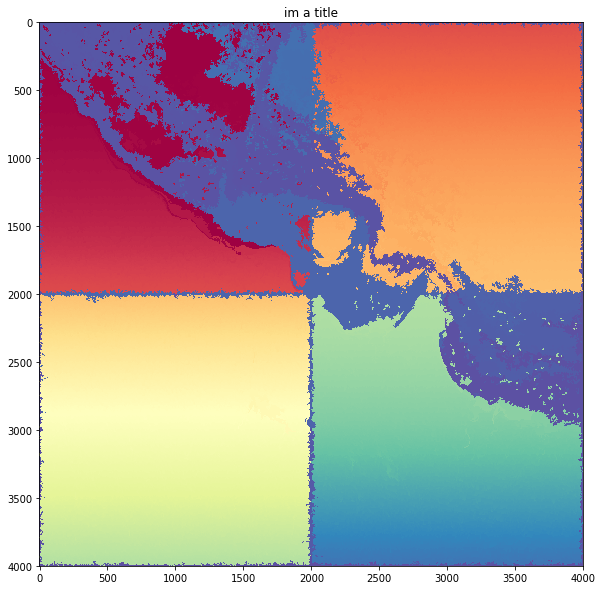

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('im a title')
ax.imshow(data[0], cmap = 'Spectral')

In [ ]:
from geoh5 import kea

ds = kea.open('LCCS_files/Ayr_Clumps_LCCSL4.kea', 'r')

df = ds.read_rat(row_end=500000)

#df
len(df)

In [13]:
#Import gdal
from osgeo import gdal

#Open existing dataset
src_ds = gdal.Open( 'LCCS_files/Ayr_Clumps_LCCSL4.kea' )

#Open output format driver, see gdal_translate --formats for list
format = "GTiff"
driver = gdal.GetDriverByName( format )

#Output to new format
dst_ds = driver.CreateCopy( 'LCCS_files/Ayr_l4_geo.tiff', src_ds )

#Properly close the datasets to flush to disk
dst_ds = None
src_ds = None

In [11]:
help(driver.Create)

Help on method Create in module osgeo.gdal:

Create(*args, **kwargs) method of osgeo.gdal.Driver instance
    Create(Driver self, char const * utf8_path, int xsize, int ysize, int bands=1, GDALDataType eType, char ** options=None) -> Dataset



In [8]:
os.chdir('/g/data/u46/users/ck9738/')

In [ ]:
#load in geotifs using rasterio, trun into an xarray :
#enter filename as a string, include subfolders!!
#previous_version DLCD found in old_DLCD, new in new_DLCD.

#use this command to print a list of all file in respective folder : 

def load_kea(file_name, x):
    #file_string = 'old_DLCD/'+file_name+'.tif'

    dataset = rasterio.open(file_name) #open using Raterio
    {i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
    data_array = dataset.read(x) #read selected band into np array
    #year_xr = xr.DataArray(data_array) #turn into Xr array for fuctionality #Now don't need xr yet
    return(data_array) #return np array into program 
    


#old_version = load_gfif('old_DLCD/DLCDv2_2009_20101.tif',1)#for old dlcd files all only have ONE band (are single year)



In [7]:
dataset = rasterio.open('Clumps.kea') #open using Raterio

In [15]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
data_array = dataset.read(1)

In [16]:
data_array

array([[64745, 64745, 64745, ..., 64954, 64954, 64954],
       [64745, 64745, 64745, ..., 64954, 64954, 64954],
       [64745, 64745, 64745, ..., 64954, 64954, 64954],
       ..., 
       [65844, 65844, 65844, ..., 65710, 65710, 65710],
       [65844, 65844, 65844, ..., 65710, 65710, 65710],
       [65844, 65844, 65844, ..., 65710, 65710, 65710]], dtype=uint32)

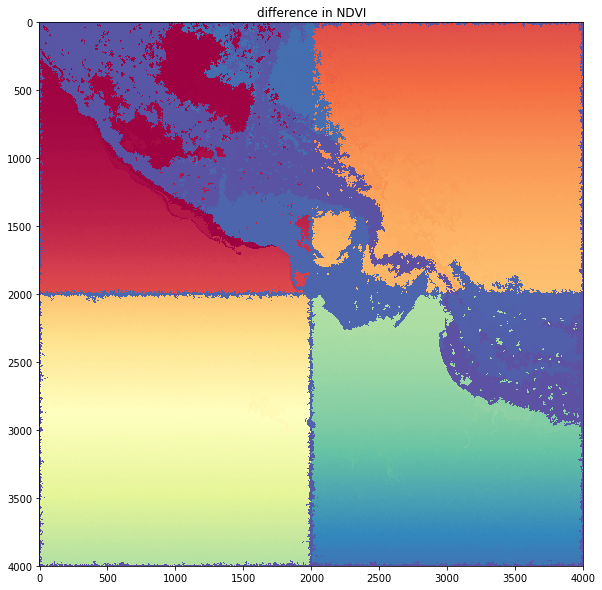

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title('difference in NDVI')
ax.imshow(data_array, cmap = 'Spectral')